In [40]:
import pickle
import os
import pandas as pd

import lightgbm as lgb
import numpy as np
import itertools
from matplotlib import pyplot as plt

# 環境設定

In [6]:
RESULT_PATH = "../results"

# 分析

In [53]:
with open(os.path.join(RESULT_PATH, "20240202_05_LightGBM_model.pickle"), mode="rb") as f:
    model = pickle.load(f)

In [56]:
model.feature_name()

['Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'RevLineCr',
 'LowDoc',
 'Sector',
 'ApprovalFY',
 'City',
 'State',
 'BankState',
 'DisbursementGross',
 'GrAppv',
 'SBA_Appv',
 'UrbanRural',
 'Franchise_or_not',
 'date_diff',
 'DisbursementDate_year',
 'DisbursementDate_month',
 'ApprovalDate_year',
 'ApprovalDate_month',
 'null_cnt',
 'DisbursementGross_per_Month',
 'AppvGrossDiff',
 'NoEmp_before_after',
 'FranchiseCode_freq_encoding',
 'RevLineCr_freq_encoding',
 'LowDoc_freq_encoding',
 'UrbanRural_freq_encoding',
 'State_freq_encoding',
 'BankState_freq_encoding',
 'Sector_freq_encoding',
 'City_freq_encoding',
 'Franchise_or_not_freq_encoding']

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

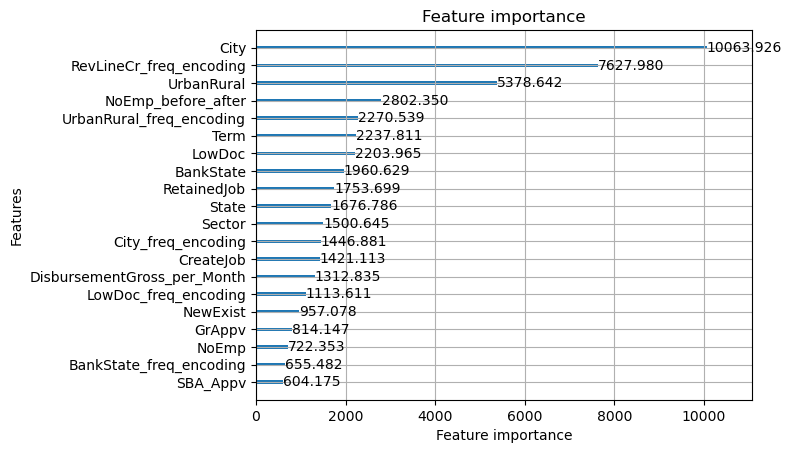

In [50]:
lgb.plot_importance(model, max_num_features=20, importance_type="gain")

In [51]:
with open(os.path.join(RESULT_PATH, "20240202_05_CatBoost_model.pickle"), mode="rb") as f:
    model = pickle.load(f)

Text(0.5, 1.0, 'Feature Importance')

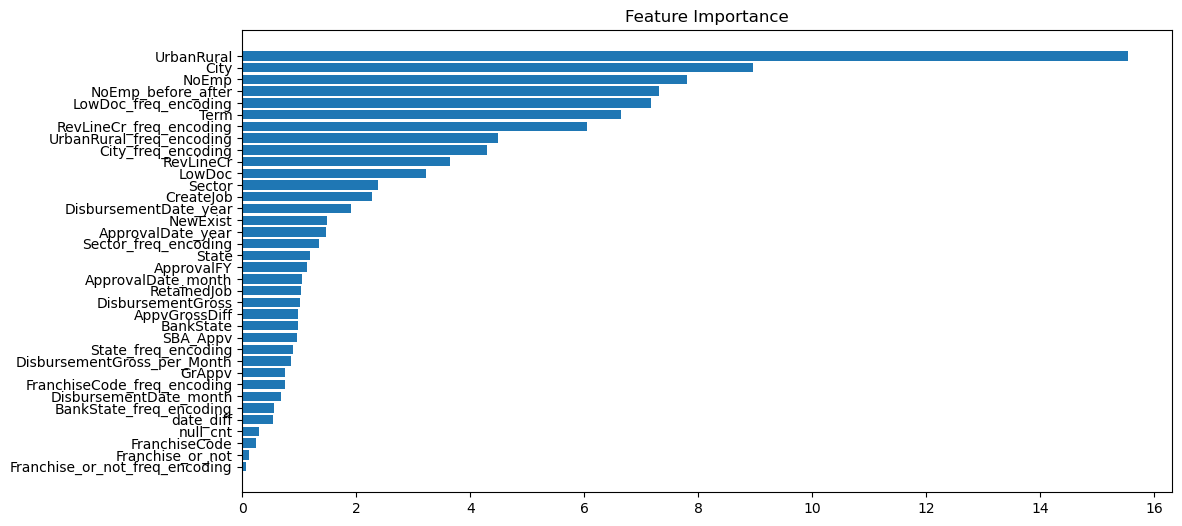

In [52]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(model.feature_names_)[sorted_idx])
plt.title('Feature Importance')

In [48]:
df = pd.DataFrame({"a": [1, 2, 3, 4, 5]})
df["a"].mask(((df["a"] == 1) | (df["a"] == 5) ), 100)

0    100
1      2
2      3
3      4
4    100
Name: a, dtype: int64